In [1]:
# Importing requir libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
# Load the data into data frame and view sample data

lc_data = pd.read_csv('loan.csv')
lc_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Identify shape of data

lc_data.shape

(39717, 111)

In [4]:
# Identifying null value counts

lc_data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

__We can see that, few of the columns has no data/null data. Such columns are of no use for analysis. Hence removing them.__

In [5]:
# Drop the columns with no data/null data

lc_data = lc_data.dropna(axis=1, how='all')
lc_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


__Based on data observed, there are few columns which has single value for entire column. Such column is not useful for analysis. Below is the list of such columns__

In [6]:
single_value_list = [col for col in lc_data.columns if lc_data[col].value_counts().shape[0]==1]
single_value_list

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [7]:
# Removing above columns from lc_data dataframe

lc_data.drop(single_value_list, axis=1, inplace=True)
lc_data.shape

(39717, 48)

In [8]:
lc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [9]:
# Loading data dictionary to dataframe
Data_Dictionary = pd.read_excel('Data_Dictionary.xlsx')
Data_Dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


__Based on data dictionary, below columns are customer behavior variables. These values are not available at the time of loan application. So, below variables can be safely removed.__

List of behavioural variables:
-  delinq_2yrs
-  earliest_cr_line
-  inq_last_6mths
-  open_acc
-  pub_rec
-  revol_bal
-  revol_util
-  total_acc
-  out_prncp
-  out_prncp_inv
-  total_pymnt
-  total_pymnt_inv
-  total_rec_prncp
-  total_rec_int
-  total_rec_late_fee
-  recoveries
-  collection_recovery_fee
-  last_pymnt_d
-  last_pymnt_amnt
-  last_credit_pull_d
-  mths_since_last_delinq
-  mths_since_last_record
-  next_pymnt_d


In [10]:
# Removing behavioural variables
lc_data.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1, errors = 'ignore', inplace=True)

In [11]:
# dataframe shape after behavioural columns removal
lc_data.shape

(39717, 25)

__Below list of columns does not contribute for the loan defaulting or full payment as they are irrelevant information for the given scenario.__
-  id
-  member_id
-  url
-  title
-  emp_title
-  zip_code
-  addr_state
-  desc

`funded_amnt` (total amount committed to that loan at that point in time) and `loan_amount` (listed amount of the loan applied for by the borrower) and they are not needed because we only need the info, `funded_amnt_inv`, how much is funded in actual. As we have funded_amnt_inv , we can remove the earlier column.

In [12]:
# Dropping the irrelevant columns from lc_data dataframe
lc_data.drop(['id', 'member_id', 'url', 'title', 'emp_title', 'zip_code', 'addr_state', 'desc', 'loan_amnt', 'funded_amnt'], axis=1, inplace=True, errors='ignore')

In [13]:
lc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt_inv       39717 non-null  float64
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_length            38642 non-null  object 
 7   home_ownership        39717 non-null  object 
 8   annual_inc            39717 non-null  float64
 9   verification_status   39717 non-null  object 
 10  issue_d               39717 non-null  object 
 11  loan_status           39717 non-null  object 
 12  purpose               39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  pub_rec_bankruptcies  39020 non-null  float64
dtypes: float64(5), obje

__Based on data ditionary, from the available columns, `loan_status` is the dependent columns. Let's check the value counts for loan_status__

In [14]:
# Get the value counts for the dependent variable: loan_status
lc_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

__If the loan status is `Current`, we won't be having information whether they will be `Fully Paid` or `Charged Off`. 
Since we are interested only in those applicants who are either defaulted or fully paid, we can remove the Current loans__

In [15]:
# Removing the records with loan_status = 'Current'

lc_data = lc_data[lc_data.loan_status!='Current']
print(lc_data.shape, '\n')

# After removal, value counts for loan_status
print(lc_data.loan_status.value_counts())

(38577, 15) 

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


In [16]:
lc_data.head()

,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0
1,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0
2,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0
3,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0
5,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0.0


## Handling Missing values

In [17]:
# Checking the missing values

lc_data.isna().sum()/lc_data.count()*100

funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.751438
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
pub_rec_bankruptcies    1.840021
dtype: float64

There are 2 columns with missing values:
-  emp_length
-  pub_rec_bankruptcies

In [18]:
# Getting unique value counts for emp_length column along with mode of the same column


print('Mode value for emp_data column:', lc_data['emp_length'].mode()[0])
lc_data['emp_length'].value_counts()

Mode value for emp_data column: 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

__Above value counts shows that the mode value has far higher frequency than that of the subsequent most frequent value.
So, we can safely assign the value of mode to the null values in `emp_length` column.__

In [19]:
# Replacing null values with mode in emp_length column

lc_data['emp_length'].fillna(lc_data['emp_length'].mode()[0], inplace=True)

In [20]:
# Check the value counts for pub_rec_bankruptcies

lc_data.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [21]:
# Calculating mode of pub_rec_bankruptcies

print("Mode value for pub_rec_bankruptcies is:", lc_data.pub_rec_bankruptcies.mode()[0])

Mode value for pub_rec_bankruptcies is: 0.0


__pub_rec_bankruptcies : Number of public record bankruptcies
<br>This value is not available for 1.84% of data. If this value is null means, there is no data available with credit bureau. So, we can replace with zero. Also, the mode value for pub_rec_bankruptcies is '0' and the next value is very far from next value count__

In [22]:
# Replacing null values with 0 in pub_rec_bankruptcies column

lc_data.pub_rec_bankruptcies.fillna(0, inplace=True)

__After replacing null values, below is the info of lc_data__

In [23]:
lc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt_inv       38577 non-null  float64
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_length            38577 non-null  object 
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  dti                   38577 non-null  float64
 14  pub_rec_bankruptcies  38577 non-null  float64
dtypes: float64(5), obje

In [24]:
lc_data.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

As the NONE category has only 3 values, we can merge them with OTHER category

In [25]:
lc_data.home_ownership.replace('NONE', 'OTHER', inplace=True)
lc_data.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: home_ownership, dtype: int64

## Converting column datatype to suitable format

In [26]:
# term field is identified as object as it contains 'months' as extension to months. 
# Removing 'months' from term field and converting it to numeric value

lc_data.term = lc_data.term.apply(lambda x:x.rstrip(' months')).astype('int64')

In [27]:
# int_rate is identified as object as it has '%' symbol at end of each value
# Removing '%' from int_rate field and converting it to float

lc_data.int_rate = lc_data.int_rate.apply(lambda x:x.rstrip('%')).astype('float')

## Getting derived columns, month & year from date

In [28]:
lc_data['issue_d_month'] = lc_data.issue_d.apply(lambda t : pd.datetime.strptime(t[:3], '%b').month)
lc_data['issue_d_year'] = lc_data.issue_d.apply(lambda t : int(t[-2:]))

In [29]:
lc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt_inv       38577 non-null  float64
 1   term                  38577 non-null  int64  
 2   int_rate              38577 non-null  float64
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_length            38577 non-null  object 
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  dti                   38577 non-null  float64
 14  pub_rec_bankruptcies  38577 non-null  float64
 15  issue_d_month      

## Removing outliers

__annual_inc outlier treatment__

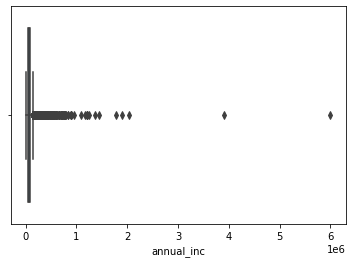

In [30]:
sns.boxplot(lc_data.annual_inc)
plt.show()

In [31]:
# Finding the upper bound value for annual_inc

upper_bound_annual_inc = lc_data.annual_inc.describe()['75%'] + (lc_data.annual_inc.describe()['75%'] - lc_data.annual_inc.describe()['25%'])*1.5
upper_bound_annual_inc

145000.0

In [32]:
lc_data.shape

(38577, 17)

In [33]:
# Removing the values after upper_bound_annual_inc as outliers
lc_data = lc_data[lc_data.annual_inc <= upper_bound_annual_inc]
lc_data.shape

(36815, 17)

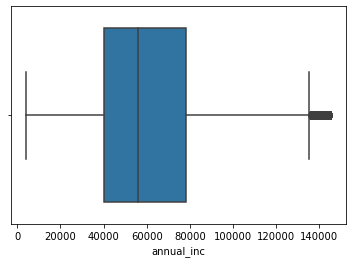

In [34]:
# Plotting annual_inc after outlier removal

sns.boxplot(lc_data.annual_inc)
plt.show()

__funded_amnt_inv outlier treatment__

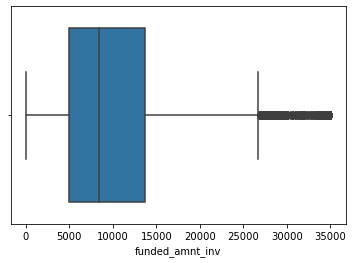

In [35]:
# funded_amnt_inv data spread with box plot

sns.boxplot(lc_data.funded_amnt_inv)
plt.show()

In [36]:
# Finding the upper bound value for funded_amnt_inv

upper_bound_funded_amnt_inv = lc_data.funded_amnt_inv.describe()['75%'] + (lc_data.funded_amnt_inv.describe()['75%'] - lc_data.funded_amnt_inv.describe()['25%'])*1.5
upper_bound_funded_amnt_inv

26736.169640500004

In [37]:
lc_data.shape

(36815, 17)

In [38]:
# Removing outliers for funded_amnt_inv

lc_data = lc_data[lc_data.funded_amnt_inv <= upper_bound_funded_amnt_inv]
lc_data.shape

(35973, 17)

<AxesSubplot:xlabel='funded_amnt_inv'>

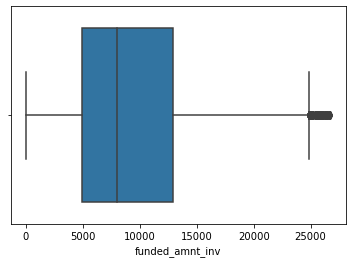

In [39]:
# Plotting boxplot after outlier treatment
sns.boxplot(lc_data.funded_amnt_inv)

__Interest rate outlier treatment__

<AxesSubplot:xlabel='int_rate'>

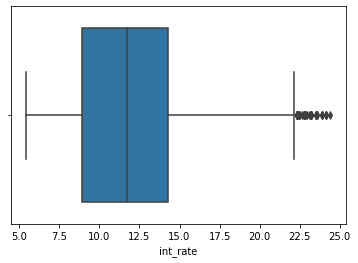

In [40]:
sns.boxplot(lc_data.int_rate)

In [41]:
# Finding the upper bound value for int_rate

upper_bound_int_rate = lc_data.int_rate.describe()['75%'] + (lc_data.int_rate.describe()['75%'] - lc_data.int_rate.describe()['25%'])*1.5
upper_bound_int_rate

22.325

In [42]:
# Removing outliers for interest rate

lc_data = lc_data[lc_data.int_rate <= upper_bound_int_rate]
lc_data.shape

(35915, 17)

<AxesSubplot:xlabel='int_rate'>

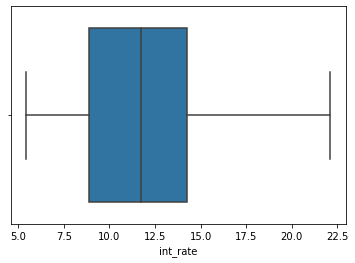

In [43]:
# Plotting box plot after outlier treatment

sns.boxplot(lc_data.int_rate)

__dit outlier treatment__

<AxesSubplot:xlabel='dti'>

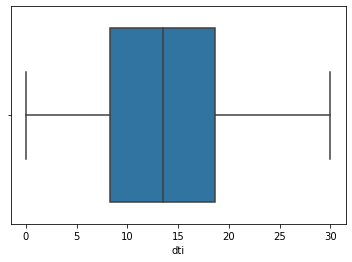

In [44]:
# Plotting boxplot to see outliers spread

sns.boxplot(lc_data.dti)

As there are no outliers, this data is safe to keep

In [45]:
lc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35915 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt_inv       35915 non-null  float64
 1   term                  35915 non-null  int64  
 2   int_rate              35915 non-null  float64
 3   installment           35915 non-null  float64
 4   grade                 35915 non-null  object 
 5   sub_grade             35915 non-null  object 
 6   emp_length            35915 non-null  object 
 7   home_ownership        35915 non-null  object 
 8   annual_inc            35915 non-null  float64
 9   verification_status   35915 non-null  object 
 10  issue_d               35915 non-null  object 
 11  loan_status           35915 non-null  object 
 12  purpose               35915 non-null  object 
 13  dti                   35915 non-null  float64
 14  pub_rec_bankruptcies  35915 non-null  float64
 15  issue_d_month      

Get the percentage of loan_status variable percent

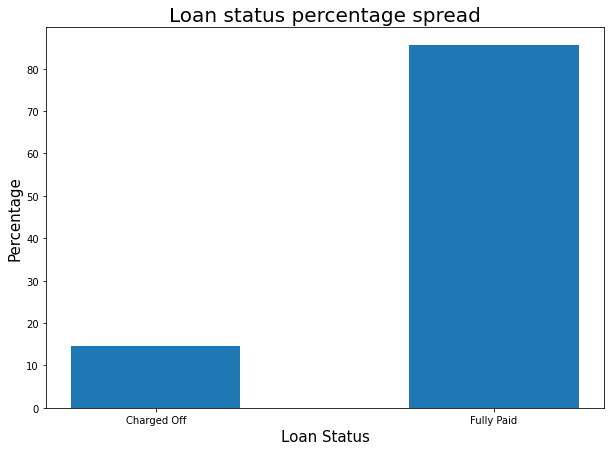

In [46]:
loan_status_percent = lc_data.groupby('loan_status').loan_status.count().transform(lambda x:x/x.sum()*100)
loan_status_percent

plt.figure(figsize=(10,7))

plt.bar(loan_status_percent.index, loan_status_percent.values, width=0.5)
plt.xlabel("Loan Status", fontsize=15)
plt.ylabel("Percentage", fontsize=15)

plt.title("Loan status percentage spread", fontsize=20)

plt.show()

This shows that 15% of data is charged off out of all past applications

## Univariate Analysis

### 1. Distribution of funded_amount

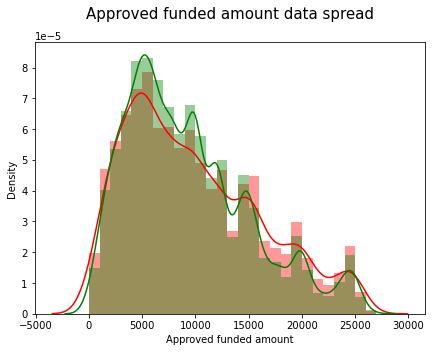

In [47]:
# Funded amount spread:
plt.figure(figsize=(7,5))
sns.distplot(lc_data[lc_data.loan_status=='Charged Off'].funded_amnt_inv, bins=range(0,30000,1000), color='r')
sns.distplot(lc_data[lc_data.loan_status=='Fully Paid'].funded_amnt_inv, bins=range(0,30000,1000), color='g')

plt.xlabel('Approved funded amount', fontsize=10)
plt.ylabel('Density', fontsize=10)

plt.title('Approved funded amount data spread\n', fontsize=15)

plt.show()

__Based on the data spread, below are the assumptions:__
-  People with funded amount ranging from 4k to 12k has high chance of repaying the loan
-  People with funded amount beyond 12k, has high chance of defaulting

### 2. Distribution based on loan term

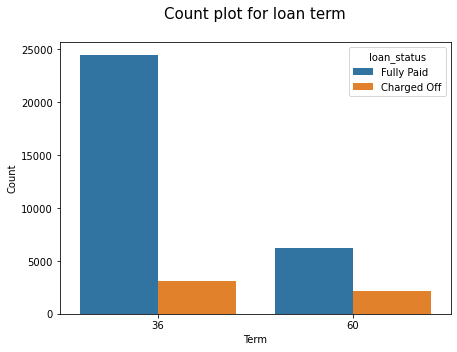

In [48]:
plt.figure(figsize=(7,5))
sns.countplot(lc_data.term, hue=lc_data.loan_status)

plt.xlabel('Term', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.title('Count plot for loan term\n', fontsize=15)
plt.show()

In [49]:
lc_data.groupby(['term','loan_status']).grade.count()

term  loan_status
36    Charged Off     3093
      Fully Paid     24482
60    Charged Off     2121
      Fully Paid      6219
Name: grade, dtype: int64

__Observations:__

-  More people opt for 36 months term than 60 months term
-  People opting loan for 36 months has high chance of re-paying up the loan as against the one opting loan for 60 months

### 3. Distribution of interest rate

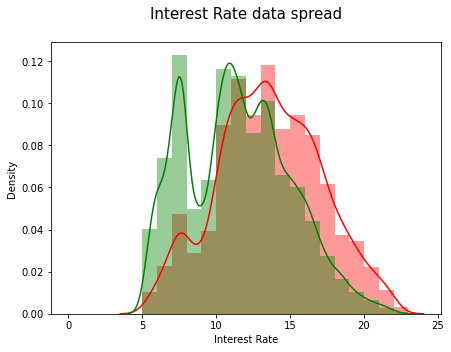

In [50]:
# int_rate spread:
plt.figure(figsize=(7,5))
sns.distplot(lc_data[lc_data.loan_status=='Charged Off'].int_rate, bins=range(0,24), color='r')
sns.distplot(lc_data[lc_data.loan_status=='Fully Paid'].int_rate, bins=range(0,24), color='g')

plt.xlabel('Interest Rate', fontsize=10)
plt.ylabel('Density', fontsize=10)

plt.title('Interest Rate data spread\n', fontsize=15)

plt.show()

__Below are the observations:__
-  People with interest rate less than 12 has high chance of re-paying the loan
-  However people going for high interest rate (More than 12) has high chance of defaulting

### 4. Distribution of lc grade

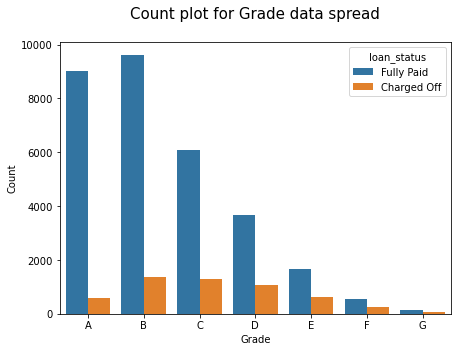

In [51]:
plt.figure(figsize=(7,5))
sns.countplot(lc_data.grade, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = lc_data.loan_status)

plt.xlabel('Grade', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.title('Count plot for Grade data spread\n', fontsize=15)

plt.show()


Text(0.5, 1.0, 'Count plot for Defaulted Grade data spread\n')

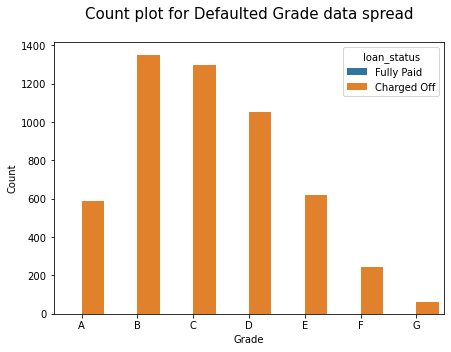

In [52]:
# Plotting graph for count all grades

plt.figure(figsize=(7,5))
sns.countplot(lc_data[lc_data.loan_status=='Charged Off'].grade, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = lc_data.loan_status)

plt.xlabel('Grade', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.title('Count plot for Defaulted Grade data spread\n', fontsize=15)


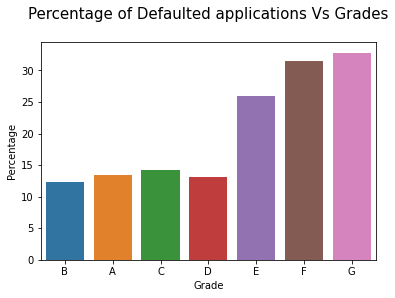

In [53]:
# Converting defaulted values to percentages wrt grade category

grade_totals = lc_data.grade.value_counts()
grade_defaulted_totals = lc_data[lc_data.loan_status=='Charged Off'].grade.value_counts()

percent_grade_default = []
for default, total in zip(grade_defaulted_totals, grade_totals):
    percent_grade_default.append(default/total*100)

sns.barplot(lc_data.grade.value_counts().index.to_list(), percent_grade_default)

plt.xlabel('Grade', fontsize=10)
plt.ylabel('Percentage', fontsize=10)

plt.title('Percentage of Defaulted applications Vs Grades\n', fontsize=15)

plt.show()

__Observations:__

-  Grade A, B, C has high number of applications
-  At a high level lc Grade B, C, D has high number of defaulters.
-  However the percentage of getting defaulting is high when the application moving from D to G

### 5. Distribution of employment length

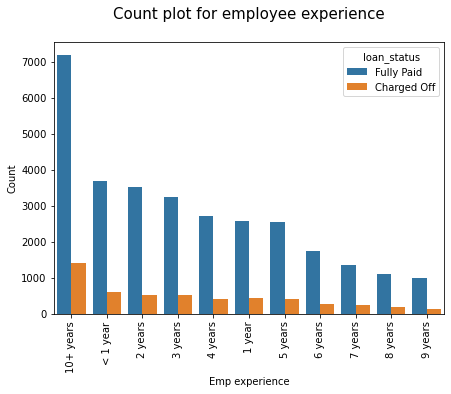

In [54]:
plt.figure(figsize=(7,5))
sns.countplot(lc_data.emp_length, hue = lc_data.loan_status, order=lc_data.emp_length.value_counts().index)
plt.xticks(rotation=90)

plt.xlabel('Emp experience', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.title('Count plot for employee experience\n', fontsize=15)

plt.show()

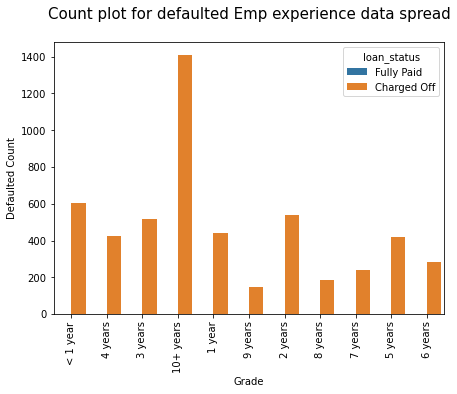

In [55]:
plt.figure(figsize=(7,5))
sns.countplot(lc_data[lc_data.loan_status=='Charged Off'].emp_length, hue = lc_data.loan_status)
plt.xticks(rotation=90)

plt.xlabel('Grade', fontsize=10)
plt.ylabel('Defaulted Count', fontsize=10)

plt.title('Count plot for defaulted Emp experience data spread\n', fontsize=15)


plt.show()

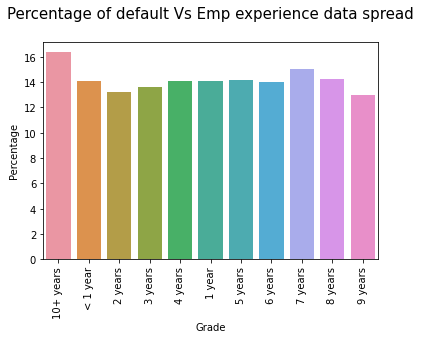

In [56]:
# Converting defaulted values to percentages wrt experience category

emp_length_totals = lc_data.emp_length.value_counts()
emp_length_defaulted_totals = lc_data[lc_data.loan_status=='Charged Off'].emp_length.value_counts()

percent_emp_length_default = []
for default, total in zip(emp_length_defaulted_totals, emp_length_totals):
    percent_emp_length_default.append(default/total*100)

sns.barplot(lc_data.emp_length.value_counts().index.to_list(), percent_emp_length_default)

plt.xlabel('Grade', fontsize=10)
plt.ylabel('Percentage', fontsize=10)

plt.title('Percentage of default Vs Emp experience data spread\n', fontsize=15)


plt.xticks(rotation=90)
plt.show()

__Observations:__
-  We are getting more applications with 10+ years of experience and they also have high percentage of loan default
-  With experience of 1, 4, 5, 6 years have almost similar percentage of degaulting

### 6. Distribution of home ownership

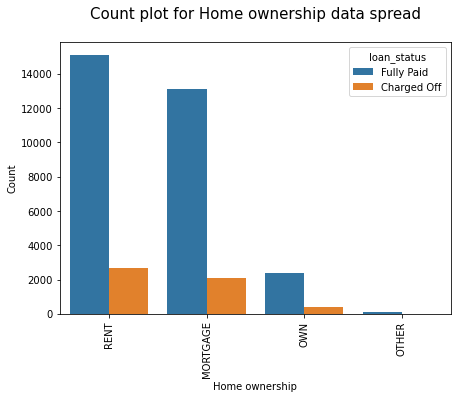

In [57]:
plt.figure(figsize=(7,5))
sns.countplot(lc_data.home_ownership, hue = lc_data.loan_status, order=lc_data.home_ownership.value_counts().index)
plt.xticks(rotation=90)

plt.xlabel('Home ownership', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.title('Count plot for Home ownership data spread\n', fontsize=15)

plt.show()

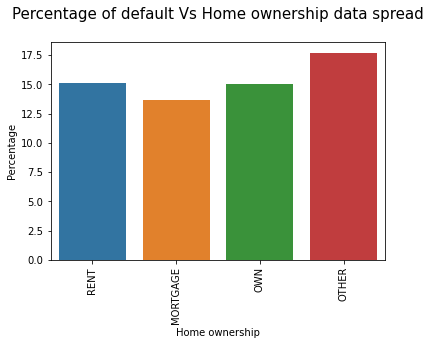

In [58]:
# Converting defaulted values to percentages wrt home ownership category

home_ownership_totals = lc_data.home_ownership.value_counts()
home_ownership_defaulted_totals = lc_data[lc_data.loan_status=='Charged Off'].home_ownership.value_counts()

percent_home_ownership_default = []
for default, total in zip(home_ownership_defaulted_totals, home_ownership_totals):
    percent_home_ownership_default.append(default/total*100)

sns.barplot(lc_data.home_ownership.value_counts().index.to_list(), percent_home_ownership_default)

plt.xlabel('Home ownership', fontsize=10)
plt.ylabel('Percentage', fontsize=10)

plt.title('Percentage of default Vs Home ownership data spread\n', fontsize=15)

plt.xticks(rotation=90)
plt.show()

__Observations:__

-  People staying in rented house or mortgage has higher percentage of loan application
-  However people with OTHER category has the highest defaulter percentage, followed bt RENT, OWN and MORTGAGE
-  People with MORTGAGE has less probability of defaulting

### 7. Distribution of Annual income 

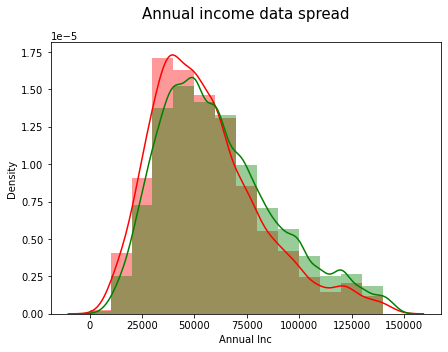

In [59]:
# annual_inc spread:
plt.figure(figsize=(7,5))
sns.distplot(lc_data[lc_data.loan_status=='Charged Off'].annual_inc, bins=range(0,150000,10000), color='r')
sns.distplot(lc_data[lc_data.loan_status=='Fully Paid'].annual_inc, bins=range(0,150000,10000), color='g')

plt.xlabel('Annual Inc', fontsize=10)
plt.ylabel('Density', fontsize=10)

plt.title('Annual income data spread\n', fontsize=15)


plt.show()

__Observations:__
-  People with annual income less than 50k has high chance of getting default than the people with income more than 50k

### 8. Verification status distribution

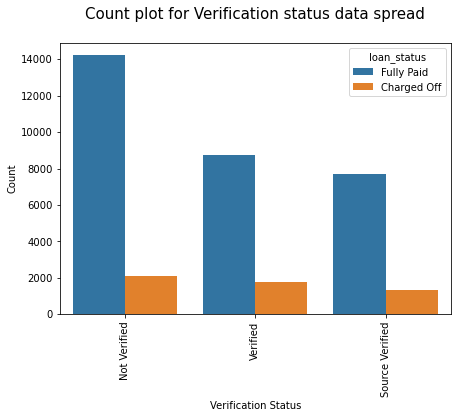

In [60]:
plt.figure(figsize=(7,5))
sns.countplot(lc_data.verification_status, hue = lc_data.loan_status, order=lc_data.verification_status.value_counts().index)
plt.xticks(rotation=90)

plt.xlabel('Verification Status', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.title('Count plot for Verification status data spread\n', fontsize=15)


plt.show()

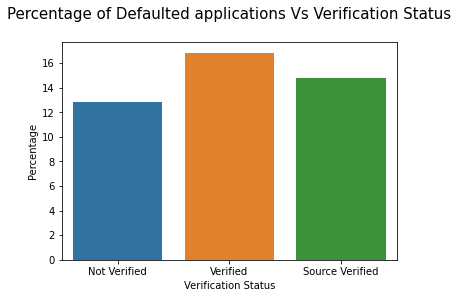

In [61]:
# Converting defaulted values to percentages wrt verification_status category

verification_status_totals = lc_data.verification_status.value_counts()
verification_status_defaulted_totals = lc_data[lc_data.loan_status=='Charged Off'].verification_status.value_counts()

percent_verification_status_default = []
for default, total in zip(verification_status_defaulted_totals, verification_status_totals):
    percent_verification_status_default.append(default/total*100)

sns.barplot(lc_data.verification_status.value_counts().index.to_list(), percent_verification_status_default)

plt.xlabel('Verification Status', fontsize=10)
plt.ylabel('Percentage', fontsize=10)

plt.title('Percentage of Defaulted applications Vs Verification Status\n', fontsize=15)

plt.show()

__Observations:__

-  People with Not verified income status has higher number of loan applications
-  On the other hand people with Verified income status has more chance of being defaulter

### 9. Distribution on purpose of loan

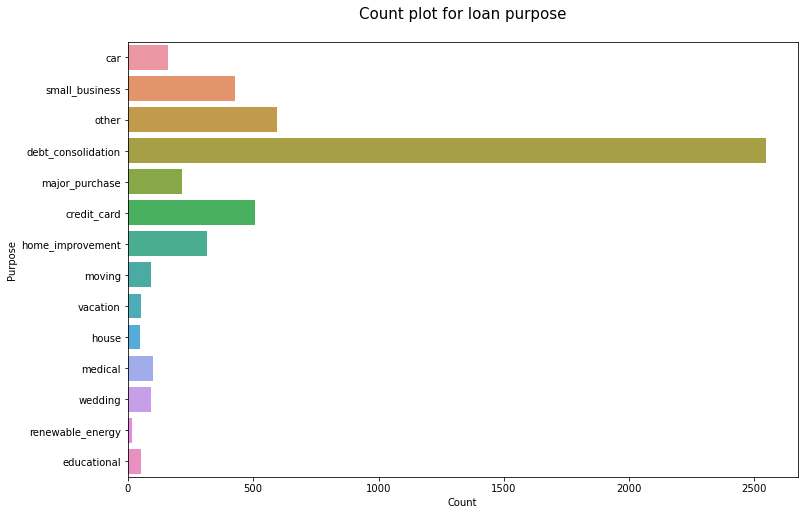

In [62]:
fig, ax = plt.subplots(figsize = (12,8))
#ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=lc_data[lc_data.loan_status == 'Charged Off'])

plt.xlabel('Count', fontsize=10)
plt.ylabel('Purpose', fontsize=10)

plt.title('Count plot for loan purpose\n', fontsize=15)

plt.show()

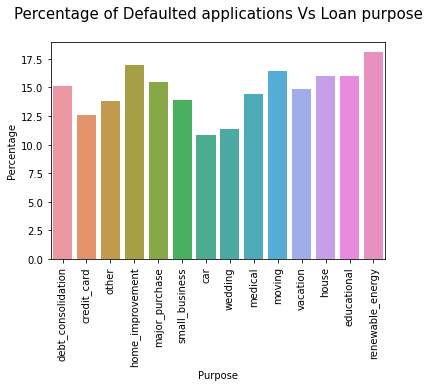

In [63]:
# Converting defaulted values to percentages wrt purpose category

purpose_totals = lc_data.purpose.value_counts()
purpose_defaulted_totals = lc_data[lc_data.loan_status=='Charged Off'].purpose.value_counts()

percent_purpose_default = []
for default, total in zip(purpose_defaulted_totals, purpose_totals):
    percent_purpose_default.append(default/total*100)

sns.barplot(lc_data.purpose.value_counts().index.to_list(), percent_purpose_default)

plt.xlabel('Purpose', fontsize=10)
plt.ylabel('Percentage', fontsize=10)

plt.title('Percentage of Defaulted applications Vs Loan purpose\n', fontsize=15)

plt.xticks(rotation=90)
plt.show()

__Observations:__

-  Highest number of people took loan for the purpose of "debt_consolidation" and they have the highest number of defaulters
-  However, the defaulter chances are more for the loan taken for "renewable_energy" and "home_improvement"

### 10. Spread of loan dti

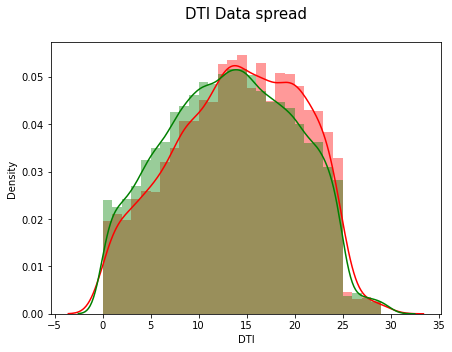

In [64]:
# dti spread:
plt.figure(figsize=(7,5))
sns.distplot(lc_data[lc_data.loan_status=='Charged Off'].dti, bins=range(0,30), color='r')
sns.distplot(lc_data[lc_data.loan_status=='Fully Paid'].dti, bins=range(0,30), color='g')

plt.xlabel('DTI', fontsize=10)
plt.ylabel('Density', fontsize=10)

plt.title('DTI Data spread\n', fontsize=15)

plt.show()

__Observations:__

-  People with dti less than 12 has high chance of re-paying the loan
-  However with more dti (>12) has hichance of defaulting
-  And there is a sudden drop of dti from 25 onwards

### 11. Loan spread based on loan issue month

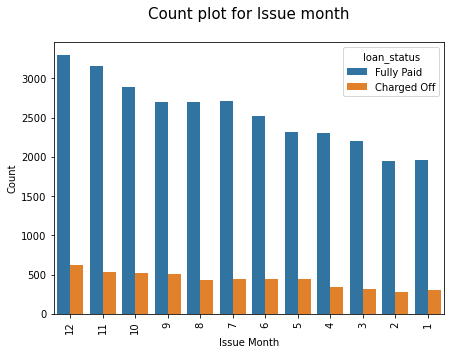

In [65]:
plt.figure(figsize=(7,5))
sns.countplot(lc_data.issue_d_month, hue = lc_data.loan_status, order=[12,11,10,9,8,7,6,5,4,3,2,1])
plt.xticks(rotation=90)

plt.xlabel('Issue Month', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.title('Count plot for Issue month\n', fontsize=15)

plt.show()

__Observations:__

-  There is an slight upward trend in the number of applications from Jan to Dec
-  And December has highest number of applications and high number of defaulters

### 12. Loan spread based on application year

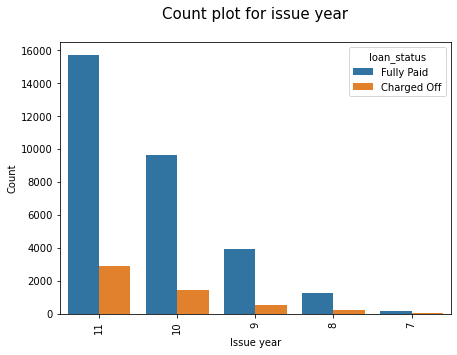

In [66]:
plt.figure(figsize=(7,5))
sns.countplot(lc_data.issue_d_year, hue = lc_data.loan_status, order=lc_data.issue_d_year.value_counts().index)
plt.xticks(rotation=90)

plt.xlabel('Issue year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.title('Count plot for issue year\n', fontsize=15)

plt.show()

__Observation:__

-  There is an increasing trend in the number of application year by year

## Bi-Variate Analysis

In [67]:
# Correlation between variables

lc_data.corr()

,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year
funded_amnt_inv,1.000000,0.317059,0.253413,0.884842,0.349145,0.097349,-0.024888,0.048179,0.219342
term,0.317059,1.000000,0.416513,0.041654,0.056168,0.076497,0.021496,0.023917,0.221058
int_rate,0.253413,0.416513,1.000000,0.235294,0.028679,0.107317,0.091179,0.017342,0.014063
installment,0.884842,0.041654,0.235294,1.000000,0.367485,0.075034,-0.021800,0.006591,-0.005891
annual_inc,0.349145,0.056168,0.028679,0.367485,1.000000,-0.079253,-0.002902,0.005789,0.017456
dti,0.097349,0.076497,0.107317,0.075034,-0.079253,1.000000,0.006255,0.016454,0.091535
pub_rec_bankruptcies,-0.024888,0.021496,0.091179,-0.021800,-0.002902,0.006255,1.000000,-0.017549,0.015478
issue_d_month,0.048179,0.023917,0.017342,0.006591,0.005789,0.016454,-0.017549,1.000000,-0.041349
issue_d_year,0.219342,0.221058,0.014063,-0.005891,0.017456,0.091535,0.015478,-0.041349,1.000000


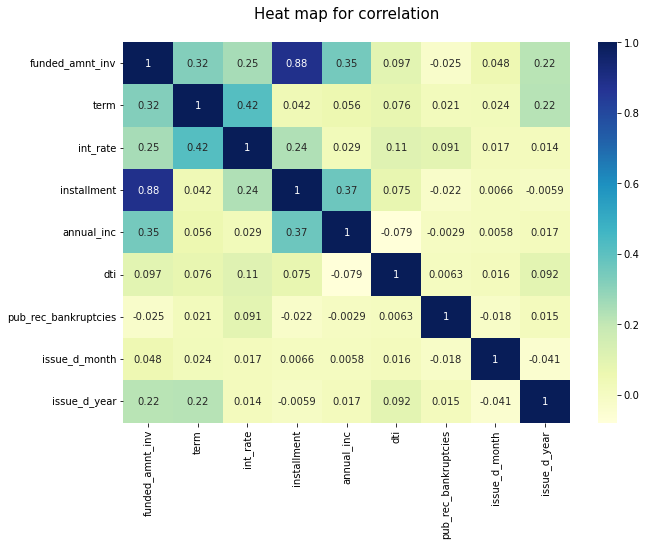

In [68]:
plt.figure(figsize=(10,7))
sns.heatmap(lc_data.corr(), cmap="YlGnBu", annot=True)

plt.title('Heat map for correlation\n', fontsize=15)

plt.show()

__Observations:__

-  Approved funded amount has a positive correlation with installements. As the funded amount increases, installment increases
-  Interest rate to term has positive correlation. As the loan term increases, interest rate increases

### 1. Emp length Vs Annual income

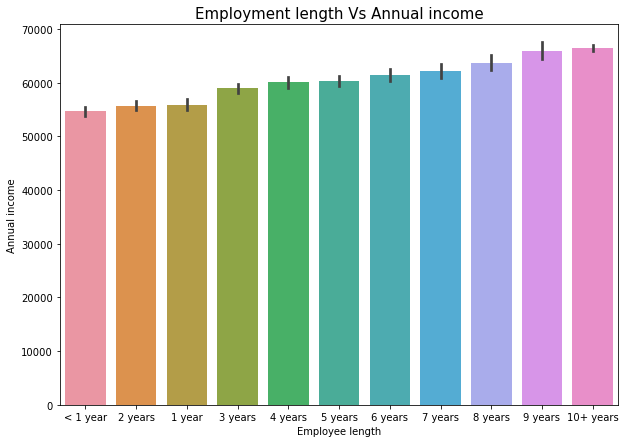

In [69]:
#spread based on the emploment length
fig, ax = plt.subplots(figsize = (10,7))

result = lc_data.groupby('emp_length')['annual_inc'].aggregate(np.average).reset_index().sort_values('annual_inc')
sns.barplot(lc_data.emp_length,lc_data.annual_inc, order=result['emp_length'])

plt.xlabel('Employee length', fontsize=10)
plt.ylabel('Annual income', fontsize=10)

plt.title("Employment length Vs Annual income", fontsize=15)

plt.show()

__Observations:__

-  As the experience is increasing the average annual income is also increasing, but at a slow rate

### 2. Grade Vs Annual income

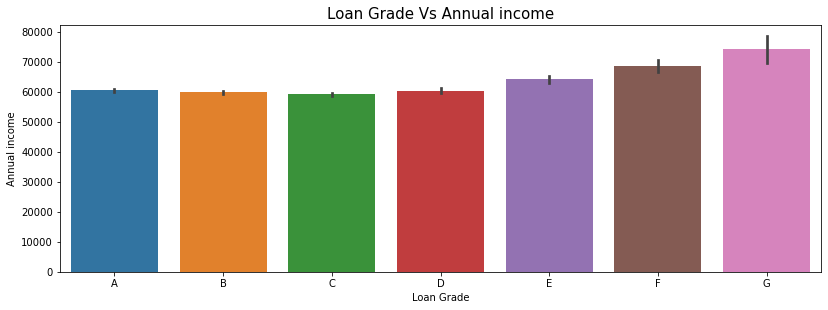

In [70]:
fig, ax = plt.subplots(figsize = (30,10))
plt.subplot(221)
sns.barplot(x='grade',y='annual_inc', data=lc_data, order=['A','B','C','D','E','F','G'])

plt.xlabel('Loan Grade', fontsize=10)
plt.ylabel('Annual income', fontsize=10)

plt.title("Loan Grade Vs Annual income", fontsize=15)

plt.show()

__Observations:__
-  As the grade moves from A to G, annual income(average) is increasing.

### 3. Grade Vs interest rate

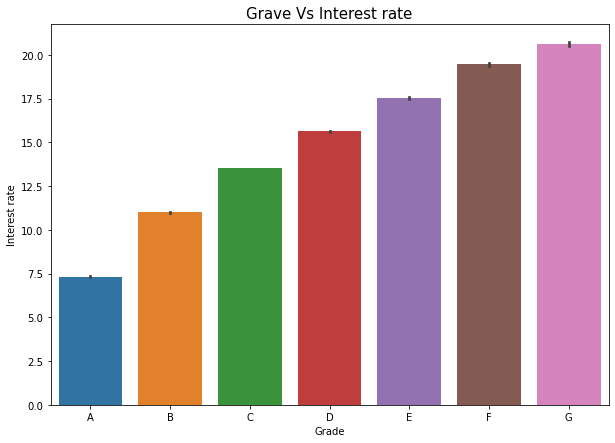

In [71]:
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(lc_data.grade, lc_data.int_rate,  order = ['A','B','C','D','E','F','G'])

plt.xlabel('Grade', fontsize=10)
plt.ylabel('Interest rate', fontsize=10)

plt.title("Grave Vs Interest rate", fontsize=15)

plt.show()


__Observations:__

-  Loan categories F & G are attracting high interest rates
-  Category A has low interest rates among all the loan categories

### 4. Term Vs Funded amount approved

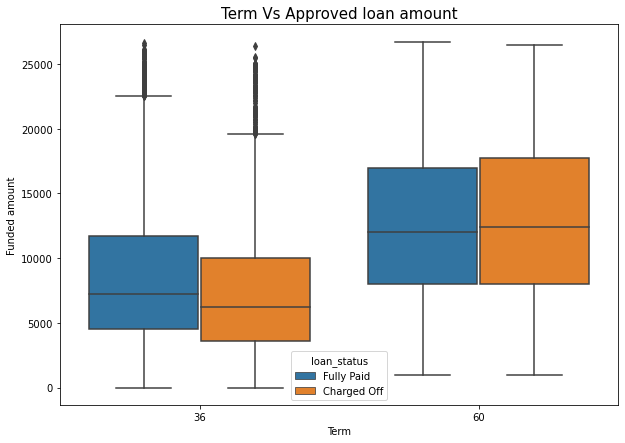

In [72]:
plt.figure(figsize = (10,7))
sns.boxplot(x=lc_data['term'],y=lc_data['funded_amnt_inv'],hue=lc_data["loan_status"],orient="v")

plt.xlabel("Term", fontsize=10)
plt.ylabel("Funded amount", fontsize=10)

plt.title("Term Vs Approved loan amount", fontsize=15)

plt.show()

__Observations:__

-  Borrower with higher loan approved amount will go for higher loan term.
-  More people with funded approved amount are opting for 36 months as term and they are re-paying the loan as well

### 5. Interest rate Vs Verification status

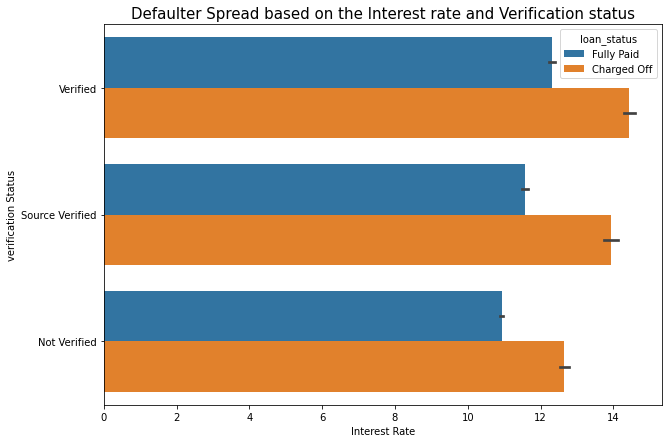

In [73]:
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(x='int_rate',y='verification_status',hue='loan_status', data=lc_data)

plt.xlabel('Interest Rate', fontsize=10)
plt.ylabel('verification Status', fontsize=10)

plt.title("Defaulter Spread based on the Interest rate and Verification status", fontsize=15)
plt.show()

__Observations:__

-  If borrower with income verified is going for high interest rate (Average), chances of getting defaulted is high
-  In all categories, if the borrower is going with low interest rates, chances of re-paying the loan is high

### 6. Issue month Vs funded amount

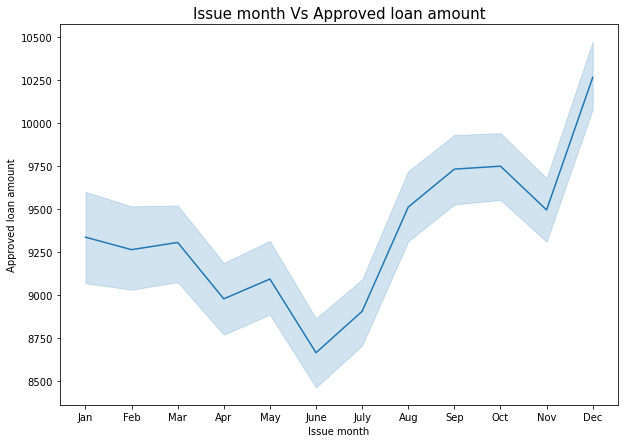

In [74]:
plt.figure(figsize=(10,7))
sns.lineplot(lc_data.issue_d_month, lc_data.funded_amnt_inv)
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])

plt.xlabel('Issue month', fontsize=10)
plt.ylabel('Approved loan amount', fontsize=10)

plt.title("Issue month Vs Approved loan amount", fontsize=15)

plt.show()

__Observations:__

-  The average approved loan amount is very less in middle of the year (June month)
-  From June, again we can see an upward trend with another dip in Nov
-  December has the highest approved loan amount (Average)